# Abalone Age Prediction

## Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from scipy.stats import skew, zscore
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset:

In [2]:
df= pd.read_csv("abalone.csv")     #reading and loading the dataset
df.head()                 #creating into a dataframe

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# to know the range, missing values, datatype, memory usage
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There are 4177 samples 9 columns. No null values in the dataset

In [4]:
# to know the dimensions
df.shape

(4177, 9)

There are 4177 rows and 9 columns including target column

In [5]:
# to know the datatype of given dataset
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

This dataset has three kinds of datatypes. Out of them seven features are float, one feature is integer and one feature is object that contains string.

In [6]:
#features in the dataset 
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

 Excluding 'Sex' feature all are Continuous.

In [7]:
#statistical summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


No feature with mixed datatype. Also no feature is there that may contain error. Features are close to normality.

# EDA

In [8]:
# checking missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

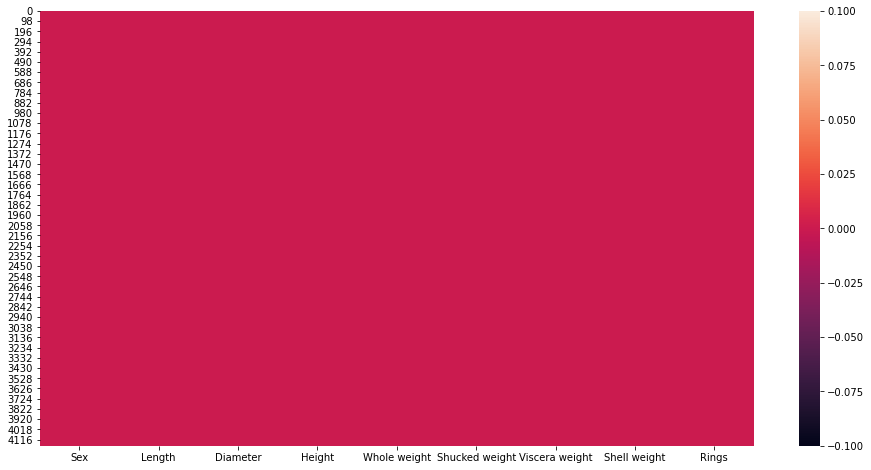

In [9]:
#another way to check missing values
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())
plt.show()                  #visualizing null values using heatmap

From the above heatmap we can see no null values are there.

In [10]:
# to know number of catagories of rings
df["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

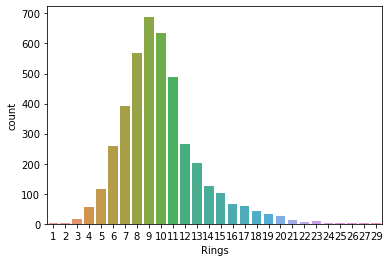

In [11]:
# to predict the age of the ring on the given feature. We need to know the 'Rings'
sns.countplot(df.Rings)             #visualizing the rings by using countplot

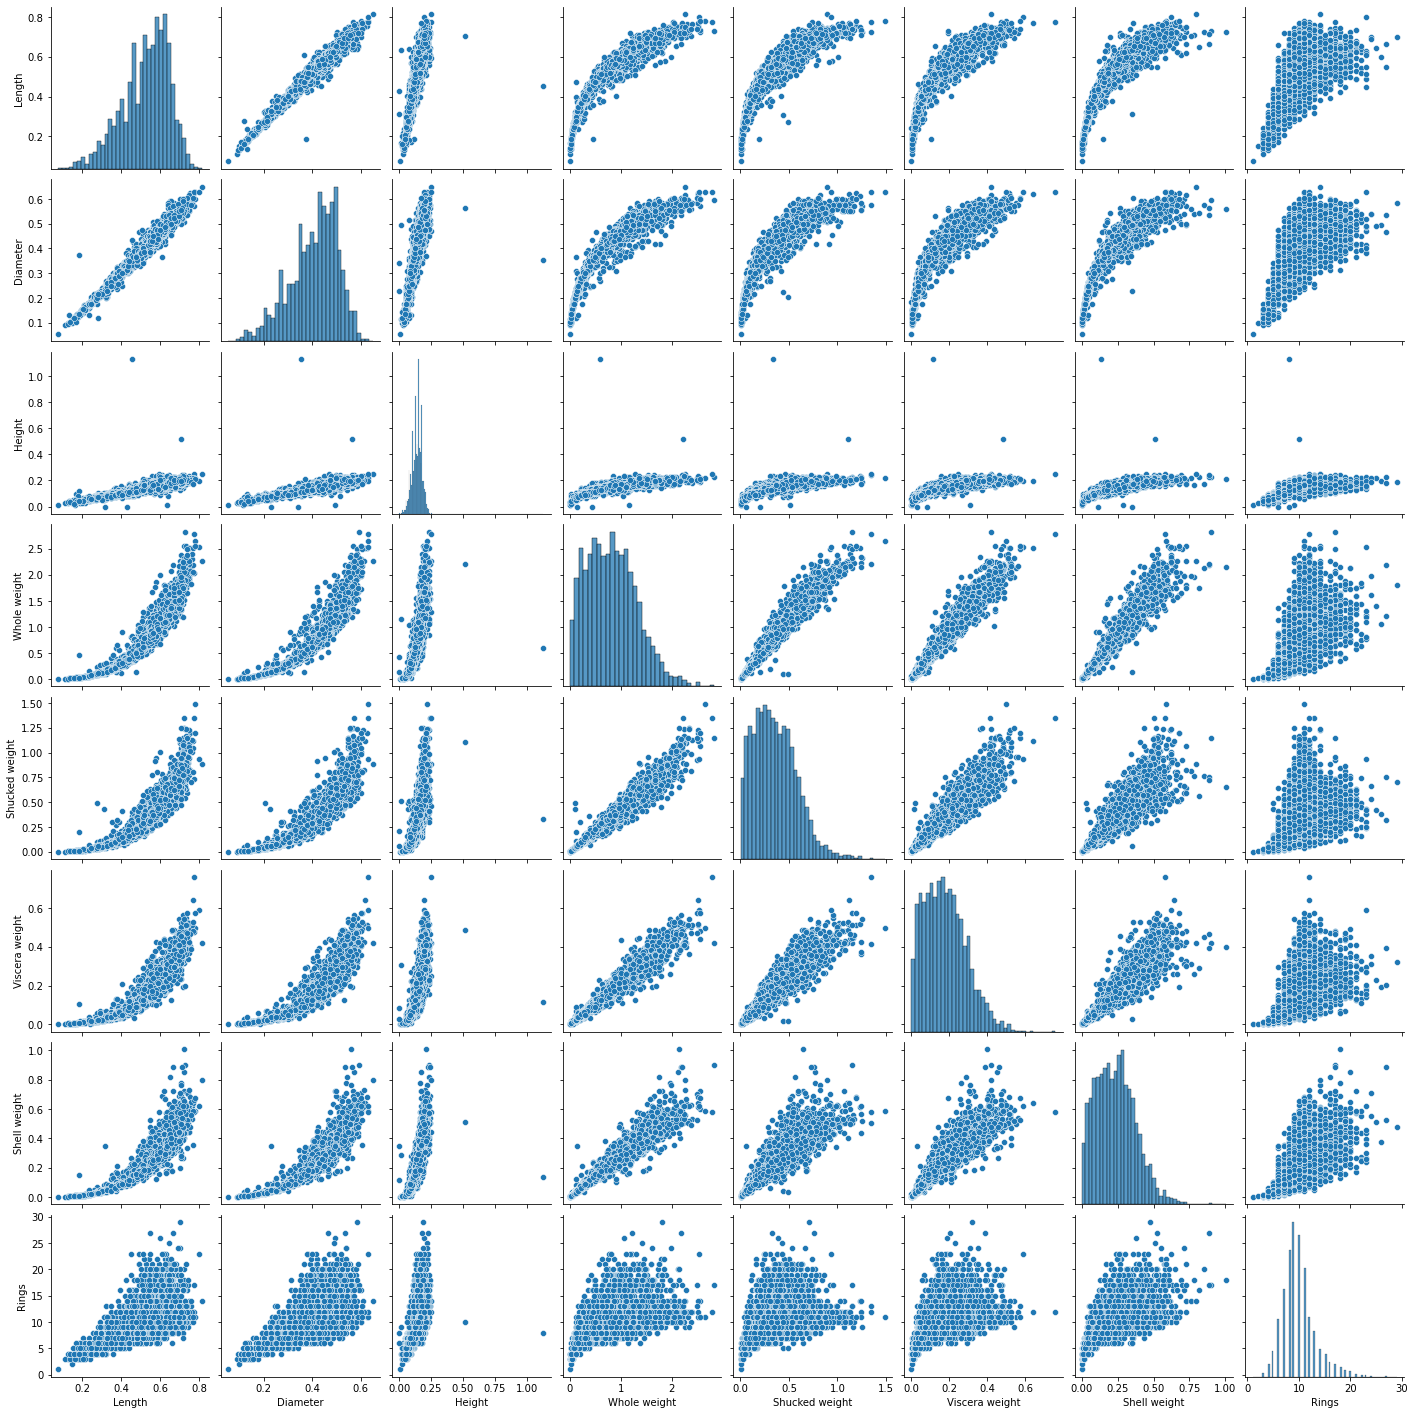

In [12]:
#visualizing using pairplot
sns.pairplot(df)

## Correlation matrix:

In [13]:
#checking correlation (multivariate analysis)
df.corr()    

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


All features are correlated to each other(no dropping of columns).

In [14]:
#example of univariate analysis
corr_matrix=df.corr()
corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

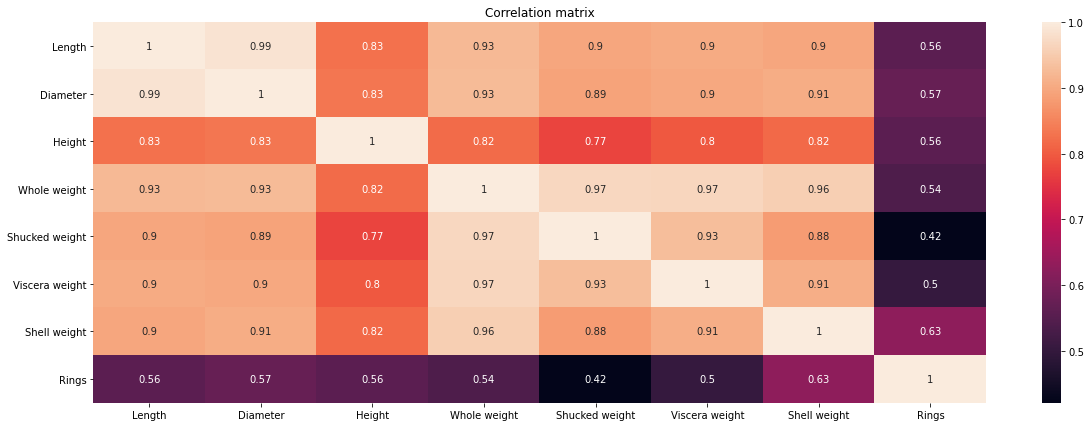

In [15]:
#checking correlation by using heatmap
plt.figure(figsize=(20,7))
plt.title("Correlation matrix")
sns.heatmap(df.corr(), annot=True)      #visualizing correlation by using heatmap
plt.show()

Most of the matrix are correlated with length. If length is more, weight, height and diameter will be more.

## Scatter Plots:

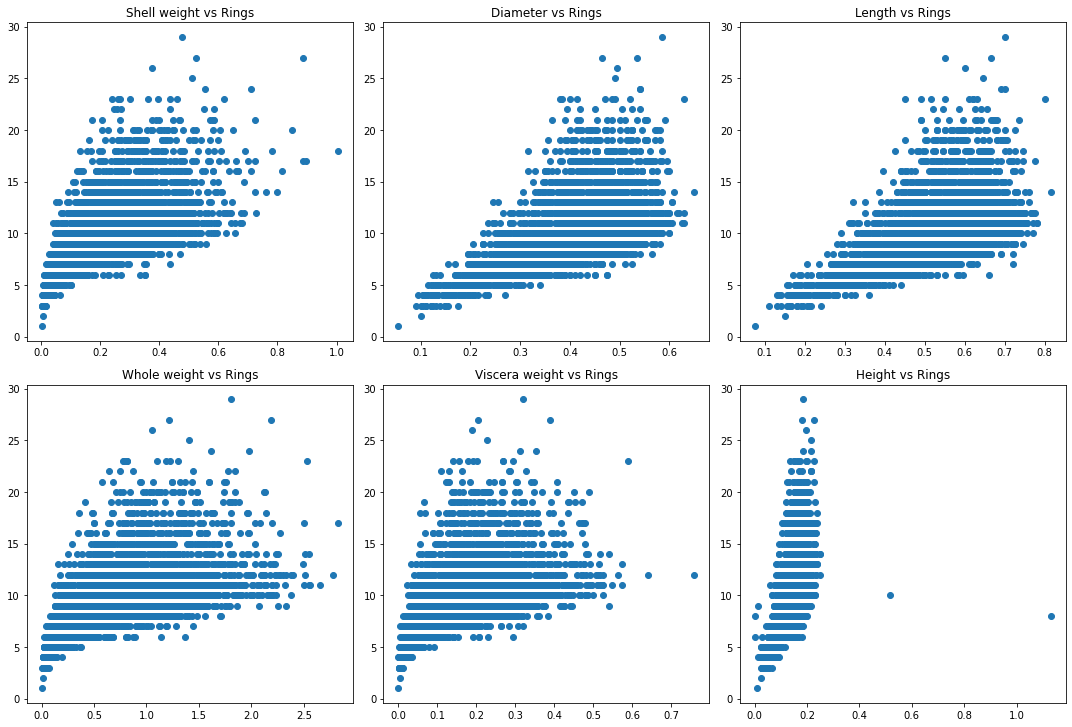

In [16]:
#comparing rings with all features using scatterplot and also checking outliers
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(df['Shell weight'],df['Rings'])    #examples of bivariate analysis

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(df['Diameter'],df['Rings'])

plt.subplot(3,3,3)
plt.title('Length vs Rings')
plt.scatter(df['Length'],df['Rings'])

plt.subplot(3,3,4)
plt.title('Whole weight vs Rings')
plt.scatter(df['Whole weight'],df['Rings'])

plt.subplot(3,3,5)
plt.title('Viscera weight vs Rings')
plt.scatter(df['Viscera weight'],df['Rings'])

plt.subplot(3,3,6)
plt.title('Height vs Rings')
plt.scatter(df['Height'],df['Rings'])

plt.tight_layout()

There are outliers we need to remove them

In [17]:
#checking the values of column 'sex'
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

'Sex' is divided into Male, Female and Infants

In [18]:
#label encoding of 'Sex' feature
label=LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])

Three catagories of Sex: M=2, F=0, I=1

In [19]:
#showing first 5 rows
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Count Plot: 

<AxesSubplot:xlabel='Sex', ylabel='count'>

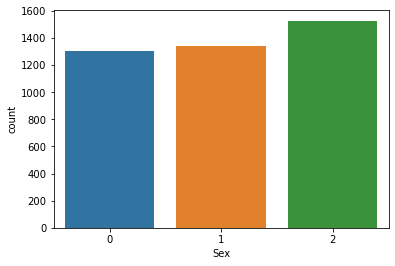

In [20]:
#viewing 'Sex' feature using countplot
sns.countplot(x='Sex', data=df)

## Distribution Plots:

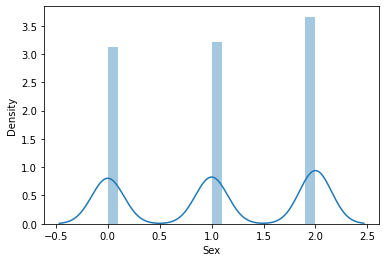

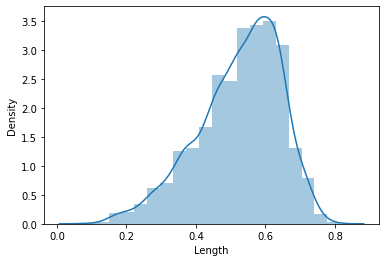

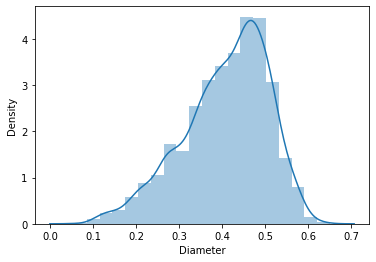

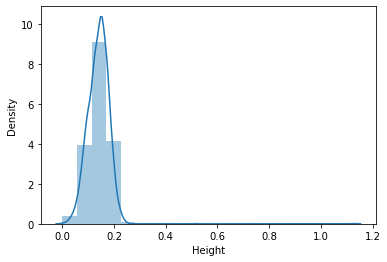

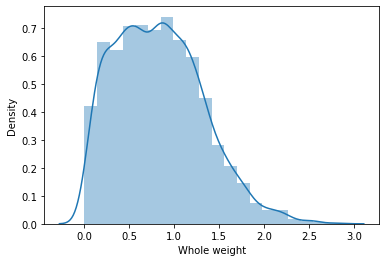

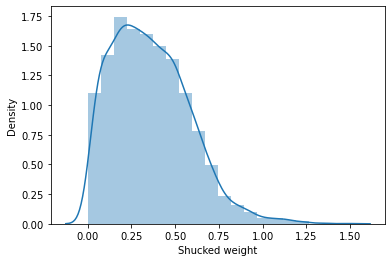

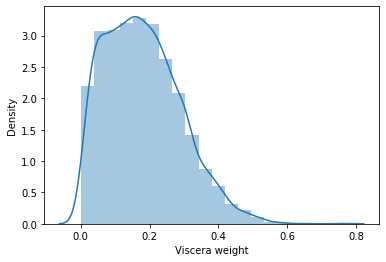

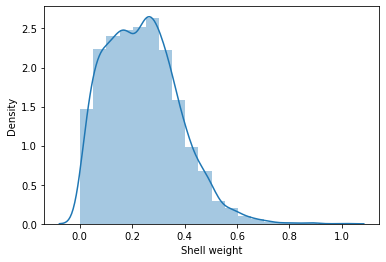

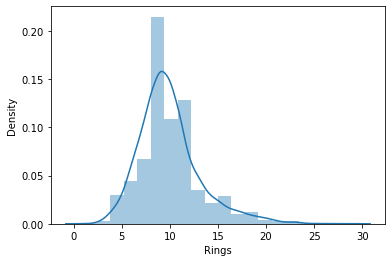

In [21]:
#visualizing all features with density by using distplot
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], bins=20)

In [22]:
#checking skewness of the data
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# Boxplot to see outliers:

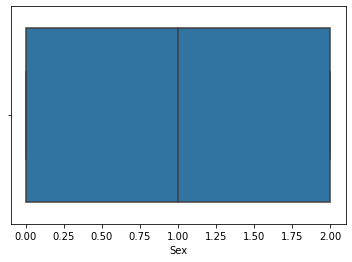

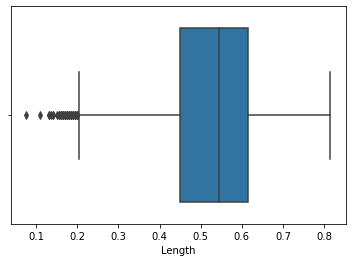

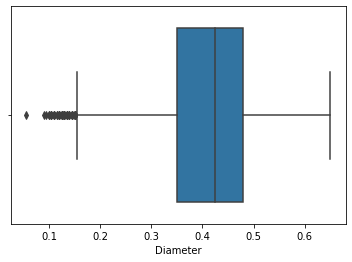

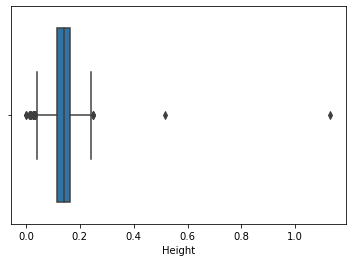

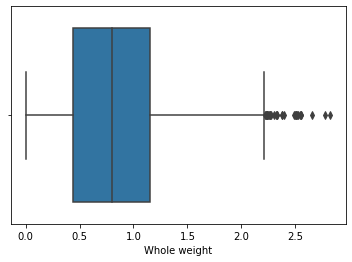

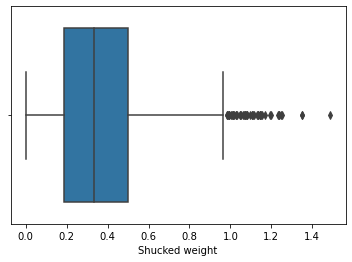

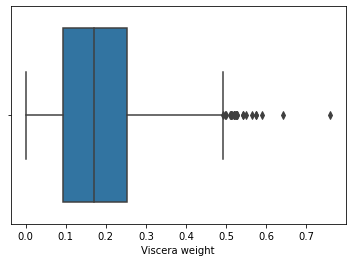

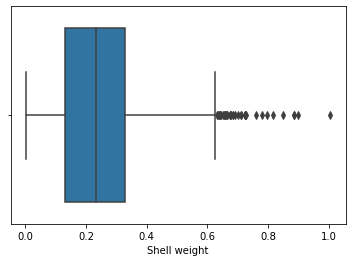

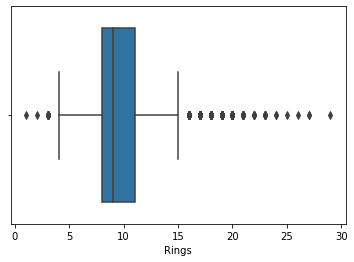

In [23]:
# visualizing all features for checking outliers
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

In [24]:
#removing rings feature using pop command
Y = df.pop('Rings')

In [25]:
#splitting the data using train test split
x_train, x_test, y_train, y_test=train_test_split(df, Y, test_size=.30, random_state=45)

In [26]:
#for removing skewness
x_train.skew()

Sex              -0.080656
Length           -0.655605
Diameter         -0.622766
Height            4.063343
Whole weight      0.515000
Shucked weight    0.702454
Viscera weight    0.575359
Shell weight      0.622781
dtype: float64

In [27]:
# using power transform to skew data in one go
df_new=power_transform(x_train)
df_new=pd.DataFrame(df_new,columns=x_train.columns)
df_new.skew()

Sex              -0.169139
Length           -0.072897
Diameter         -0.070275
Height           -0.142984
Whole weight     -0.004845
Shucked weight    0.026693
Viscera weight    0.041209
Shell weight      0.023257
dtype: float64

## Removing Outliers:

In [28]:
#using zscore technique
z=np.abs(zscore(df))

In [29]:
threshold=3
print(np.where(z>3))

(array([  81,  129,  163,  164,  165,  165,  165,  166,  168,  170,  236,
        236,  236,  237,  237,  238,  238,  239,  277,  334,  358,  358,
        526,  526,  694,  696,  696,  719,  719,  720,  720,  891,  891,
        891, 1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206,
       1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418,
       1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756,
       1757, 1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1982,
       1986, 1987, 1987, 2051, 2090, 2108, 2114, 2114, 2157, 2161, 2208,
       2274, 2334, 2334, 2368, 2381, 2544, 2623, 2624, 2624, 2624, 2625,
       2709, 2710, 2710, 2810, 2810, 2811, 2811, 2811, 2862, 2863, 2863,
       2863, 3007, 3008, 3148, 3149, 3151, 3188, 3427, 3427, 3427, 3599,
       3599, 3628, 3713, 3715, 3715, 3715, 3715, 3800, 3837, 3899, 3899,
       3902, 3961, 3962, 3996, 4145, 4148], dtype=int64), array([7, 7, 7, 7, 4, 5, 7, 7, 7, 6, 1, 2, 3, 1, 2, 1, 2, 1, 7, 7

In [30]:
#checking dimension after the removal of outliers 
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 8)
(4084, 8)


# Percentage data loss:

In [31]:
loss_percent=(4177-4084)/4177*100
print(loss_percent)

2.2264783337323437


In [32]:
#dividing the features and vectors
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

## Scaling:

In [33]:
#scaling on the feature column
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building the model

## Cross Validation Score Method:

In [34]:
models= [SVR(), GradientBoostingRegressor(), RandomForestRegressor(), RandomForestClassifier(), AdaBoostRegressor(), DecisionTreeRegressor(), KNeighborsRegressor()]
for m in models:
    print(m)
    print('Cross Validation Score:',np.mean(cross_val_score(m,x_train,y_train,scoring='neg_mean_squared_error', cv=10)))

SVR()
Cross Validation Score: -4.686812782141697
GradientBoostingRegressor()
Cross Validation Score: -4.60063661963347
RandomForestRegressor()
Cross Validation Score: -4.651425399621301
RandomForestClassifier()
Cross Validation Score: -6.179138809668521
AdaBoostRegressor()
Cross Validation Score: -8.875605132035396
DecisionTreeRegressor()
Cross Validation Score: -8.611900977137783
KNeighborsRegressor()
Cross Validation Score: -5.214480200102857


In [35]:
forest=RandomForestRegressor(n_estimators=100)
forest.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
pred=forest.predict(x_test)

In [37]:
np.sqrt(mean_squared_error(pred, y_test))

2.240326235784249

In [38]:
r2_score(pred,y_test)

0.17910483656975695

## Hyper Parameter Tuning:

In [39]:
grid= RandomizedSearchCV(forest, n_iter=20,
                         param_distributions=dict(
max_depth=np.arange(5,20+1),
max_features=np.arange(1,len(df.columns))
)
                        )

In [40]:
grid.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7])})

In [41]:
print(grid.best_params_)

{'max_features': 4, 'max_depth': 12}


Hyper parameter tunning of SVM is used to deal with large no. of multiclass classification problems and also deals with large dataset.

In [42]:
svmModel = SVR(kernel='linear', C=1, gamma=.1)
svmModel.fit(x_train, y_train)
pred = svmModel.predict(x_test)
r2_score(y_test,pred)

0.48632002222878956

In [43]:
params = {'kernel': ['linear', 'rbf'],
         'C': [ .1,1,10,.01],
         'gamma': [.1,1,10,.01,.001]
         }
sv = SVR()

In [44]:
g = GridSearchCV(sv, params, cv=5, scoring='r2')

In [45]:
g.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 0.01],
                         'gamma': [0.1, 1, 10, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='r2')

In [46]:
g.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [47]:
g.best_score_

0.5669028366878109

RandomForest and other Regression were giving upto 25%, tunning SVM gives upto 54.6% accuracy(deal with more complex datas).

In [48]:
svmModel = SVR(kernel='rbf', C=10, gamma=.1)
svmModel.fit(x_train, y_train)
pred = svmModel.predict(x_test)
r2_score(y_test,pred)

0.5480524134425478

In [49]:
np.sqrt(mean_squared_error(pred, y_test))

2.1688735110141426

## Saving the model:

In [50]:
filename ="Abalone_Age_Prediction.pkl"  #saving the model as a pickle
pickle.dump(svmModel, open(filename, 'wb')) 

## Conclusion:

In [51]:
a=np.array(y_test)
predicted=np.array(svmModel.predict(x_test))
df_com= pd.DataFrame({"Original":a, "predicted": predicted}, index=range(len(a)))  #creating a data frame
df_com

,Original,predicted
0,11,10.142410
1,7,6.931526
2,9,9.490627
3,6,7.663055
4,12,11.460470
5,8,8.826361
6,7,9.510730
7,17,13.422369
8,9,7.585709
9,10,12.953812
